In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [7]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=91)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.svm import SVC


In [13]:
model_lin = SVC(kernel='linear')
model_lin.fit(X_train_scaled, y_train)
model_lin.score(X_test_scaled, y_test)


0.8043478260869565

In [14]:
model_poly = SVC(kernel='poly')
model_poly.fit(X_train_scaled, y_train)
model_poly.score(X_test_scaled, y_test)


0.8913043478260869

In [15]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_scaled, y_train)
model_rbf.score(X_test_scaled, y_test)


0.8913043478260869

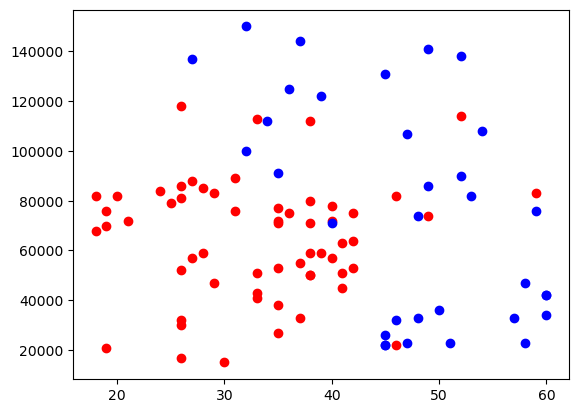

In [16]:
class_0_act = X_test[y_test == 0]
class_1_act = X_test[y_test == 1]
plt.scatter(class_0_act['Age'], class_0_act['EstimatedSalary'], c='red')
plt.scatter(class_1_act['Age'], class_1_act['EstimatedSalary'], c='blue')


Text(0.5, 1.0, 'Linear Kernel')

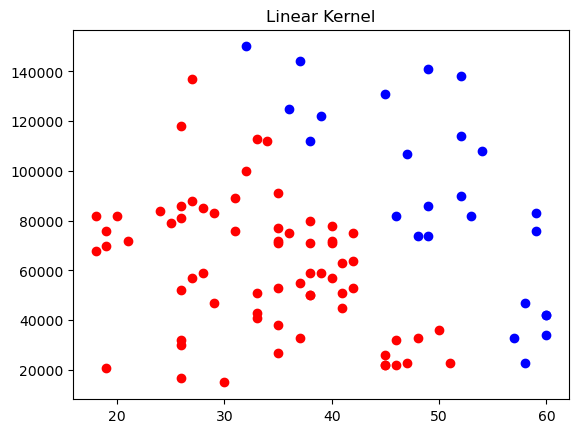

In [17]:
y_pre = model_lin.predict(X_test_scaled)
class_0_pre = X_test[y_pre == 0]
class_1_pre = X_test[y_pre == 1]
plt.scatter(class_0_pre['Age'], class_0_pre['EstimatedSalary'], c='red')
plt.scatter(class_1_pre['Age'], class_1_pre['EstimatedSalary'], c='blue')
plt.title('Linear Kernel')


Text(0.5, 1.0, 'Polynomial Kernel')

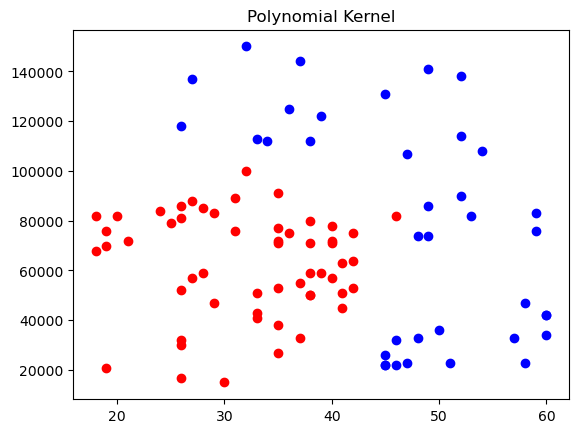

In [18]:
y_pre = model_poly.predict(X_test_scaled)
class_0_pre = X_test[y_pre == 0]
class_1_pre = X_test[y_pre == 1]
plt.scatter(class_0_pre['Age'], class_0_pre['EstimatedSalary'], c='red')
plt.scatter(class_1_pre['Age'], class_1_pre['EstimatedSalary'], c='blue')
plt.title('Polynomial Kernel')


Text(0.5, 1.0, 'RBF Kernel')

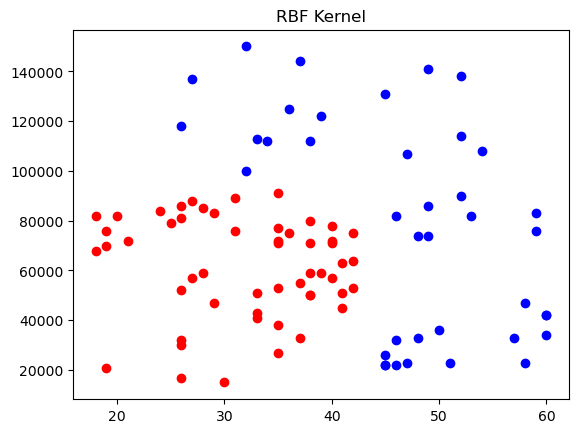

In [19]:
y_pre = model_rbf.predict(X_test_scaled)
class_0_pre = X_test[y_pre == 0]
class_1_pre = X_test[y_pre == 1]
plt.scatter(class_0_pre['Age'], class_0_pre['EstimatedSalary'], c='red')
plt.scatter(class_1_pre['Age'], class_1_pre['EstimatedSalary'], c='blue')
plt.title('RBF Kernel')


In [20]:
import numpy as np


In [21]:
plot_data = []
for x in range(0, 100, 1):
    for y in range(0, 100, 1):
        plot_data.append([x, y])
plot_data = np.array(plot_data) / 100


In [22]:
plot_data


array([[0.  , 0.  ],
       [0.  , 0.01],
       [0.  , 0.02],
       ...,
       [0.99, 0.97],
       [0.99, 0.98],
       [0.99, 0.99]])

In [23]:
plot_data.shape


(10000, 2)

Text(0.5, 1.0, 'Linear Kernel')

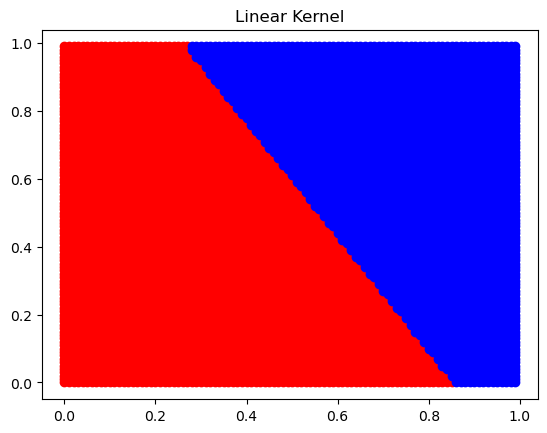

In [24]:
y_plot = model_lin.predict(plot_data)
class_0 = plot_data[y_plot == 0]
class_1 = plot_data[y_plot == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='red')
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue')
plt.title('Linear Kernel')


Text(0.5, 1.0, 'Poly Kernel')

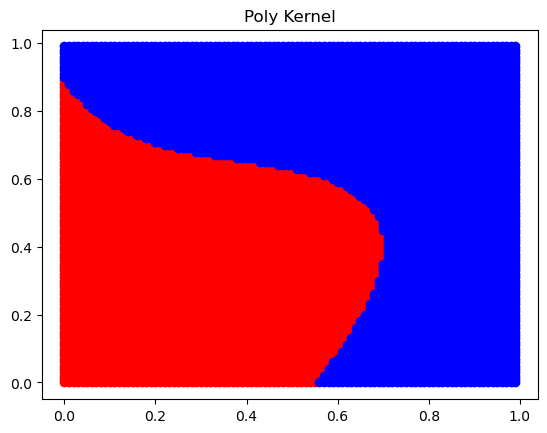

In [25]:
y_plot = model_poly.predict(plot_data)
class_0 = plot_data[y_plot == 0]
class_1 = plot_data[y_plot == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='red')
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue')
plt.title('Poly Kernel')


Text(0.5, 1.0, 'RBF Kernel')

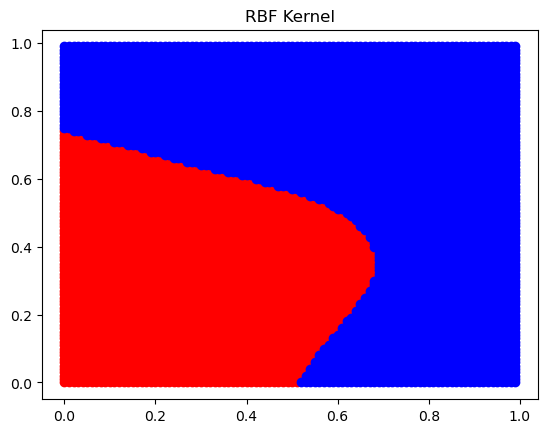

In [26]:
y_plot = model_rbf.predict(plot_data)
class_0 = plot_data[y_plot == 0]
class_1 = plot_data[y_plot == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='red')
plt.scatter(class_1[:, 0], class_1[:, 1], c='blue')
plt.title('RBF Kernel')


In [27]:
pts = np.array([[25, 60000], [50, 120000]])
pts_scaled = scaler.transform(pts)


C:\Users\athar\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [28]:
pts_scaled


array([[0.16666667, 0.33333333],
       [0.76190476, 0.77777778]])

In [29]:
y = model_rbf.predict(pts_scaled)
y


array([0, 1], dtype=int64)